# **Problem Statement:**

---


- The retail business needs to optimize its sales strategies and inventory management to enhance revenue and customer satisfaction.
- By analyzing the sales data, including trends in sales, product combinations, and city-specific and hourly sales distributions, the business can make data-driven decisions.



# **Proposed Solution:**

---
- (I) - Load the CSV files from the specified folder and combine them into a single DataFrame.
- (II) - Clean the data by excluding rows with headers and missing values.
- (III) - Extract features such as year, month, hour, and city from the data.
- (IV) - Analyze the data
- (V) - Provide data-driven insights to inform decision-making for sales strategies and inventory management.

In [31]:
# import libraries
import pandas as pd
import os
import numpy as np
import seaborn as sns
from matplotlib import pylab as plt

import warnings
warnings.filterwarnings('ignore')
sns.set_palette(['#0892a5','#2e9b9b','#50a290','#6fa985','#8dad7f','#a9b17e','#c4b383','#dbb68f'])

# (I) - Load the CSV files from the specified folder and combine them into a single DataFrame:

In [32]:
# Specify the path to the dataset folder
folder_path = '/content/sample_data/dataset'  # Replace 'your_folder_name' with your folder's name
files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.csv')]

In [33]:
# Load and combine CSV files
for file_path in files:
    df = pd.read_csv(file_path)

In [34]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"


In [35]:
df.shape

(12011, 6)

In [36]:
# Exclude header rows from the dataset
df = df[df['Order ID'] != 'Order ID']

In [37]:
# Reset the DataFrame index and drop the old index column
df = df.reset_index()
df = df.drop(columns='index')

In [38]:
df.sample(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2882,239440,Wired Headphones,1,11.99,08/08/19 02:48,"417 Pine St, Los Angeles, CA 90001"
3238,239789,USB-C Charging Cable,1,11.95,08/04/19 15:22,"948 13th St, Boston, MA 02215"
7843,244191,Bose SoundSport Headphones,1,99.99,08/13/19 20:46,"982 Center St, Boston, MA 02215"
3646,240183,Google Phone,1,600,08/16/19 08:37,"944 River St, San Francisco, CA 94016"
8596,244908,27in FHD Monitor,1,149.99,08/14/19 19:23,"135 Adams St, Los Angeles, CA 90001"


# (II) - Clean the data by excluding rows with headers and missing values:

In [39]:
# Check for data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11985 entries, 0 to 11984
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          11957 non-null  object
 1   Product           11957 non-null  object
 2   Quantity Ordered  11957 non-null  object
 3   Price Each        11957 non-null  object
 4   Order Date        11957 non-null  object
 5   Purchase Address  11957 non-null  object
dtypes: object(6)
memory usage: 561.9+ KB


In [40]:
# Check for null values
df.isna().sum()

Order ID            28
Product             28
Quantity Ordered    28
Price Each          28
Order Date          28
Purchase Address    28
dtype: int64

In [41]:
# Check rows with null values
df[df.isna().any(axis=1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
310,NaN,NaN,NaN,NaN,NaN,NaN
1220,NaN,NaN,NaN,NaN,NaN,NaN
2639,NaN,NaN,NaN,NaN,NaN,NaN
2675,NaN,NaN,NaN,NaN,NaN,NaN
3109,NaN,NaN,NaN,NaN,NaN,NaN
3300,NaN,NaN,NaN,NaN,NaN,NaN
4277,NaN,NaN,NaN,NaN,NaN,NaN
4293,NaN,NaN,NaN,NaN,NaN,NaN
4443,NaN,NaN,NaN,NaN,NaN,NaN
4667,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
# Drop rows with null values
df = df.dropna()

In [43]:
# Correct data types
df['Quantity Ordered'] = df['Quantity Ordered'].astype('int64')
df['Price Each'] = df['Price Each'].astype('float')
df['Order Date'] = pd.to_datetime(df['Order Date'])

# (III) - Extract features such as year, month, hour, and city from the data:

In [44]:
# Adding new features and performing feature extraction
def feature_extraction(data):
    # Function to extract city from address
    def get_city(address):
        return address.split(',')[1]

    # Function to extract state from address
    def get_state(address):
        return address.split(',')[2].split(' ')[1]

    # Extract year, month, hour, and minute from order date
    data['Year'] = data['Order Date'].dt.year
    data['Month'] = data['Order Date'].dt.month
    data['Hour'] = data['Order Date'].dt.hour
    data['Minute'] = data['Order Date'].dt.minute

    # Calculate sales as quantity ordered multiplied by price each
    data['Sales'] = data['Quantity Ordered'] * data['Price Each']

    # Extract cities data from purchase address
    data['Cities'] = data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")

    return data

In [45]:
df = feature_extraction(df)

In [46]:
df.sample(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,Month,Hour,Minute,Sales,Cities
3029,239586,Wired Headphones,1,11.99,2019-08-28 01:09:00,"876 Sunset St, New York City, NY 10001",2019,8,1,9,11.99,New York City (NY)
10809,247039,27in FHD Monitor,1,149.99,2019-08-27 10:33:00,"757 14th St, San Francisco, CA 94016",2019,8,10,33,149.99,San Francisco (CA)
10211,246461,Bose SoundSport Headphones,1,99.99,2019-08-19 15:26:00,"166 West St, New York City, NY 10001",2019,8,15,26,99.99,New York City (NY)


In [47]:
# Filter data for the year 2019
df = df[df['Year'] == 2019]

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11957 entries, 0 to 11984
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order ID          11957 non-null  object        
 1   Product           11957 non-null  object        
 2   Quantity Ordered  11957 non-null  int64         
 3   Price Each        11957 non-null  float64       
 4   Order Date        11957 non-null  datetime64[ns]
 5   Purchase Address  11957 non-null  object        
 6   Year              11957 non-null  int32         
 7   Month             11957 non-null  int32         
 8   Hour              11957 non-null  int32         
 9   Minute            11957 non-null  int32         
 10  Sales             11957 non-null  float64       
 11  Cities            11957 non-null  object        
dtypes: datetime64[ns](1), float64(2), int32(4), int64(1), object(4)
memory usage: 1.0+ MB


# (IV) - Analyze the data

In [49]:
# Calculate total orders, products sold, and total sales for 2019
total_year_order = df.shape[0]
total_product_sold = df['Quantity Ordered'].sum()
total_year_sales = df['Sales'].sum()

print(f'Total orders in 2019: {total_year_order:,} orders')
print(f'Total products sold in 2019: {total_product_sold:,} items')
print(f'Total sales in 2019: {total_year_sales:,} USD')

Total orders in 2019: 11,957 orders
Total products sold in 2019: 13,442 items
Total sales in 2019: 2,244,412.3099999996 USD


# (V) - Provide data-driven insights to inform decision-making for sales strategies and inventory management:

# Insights and Analysis

1. Monthly Sales Analysis

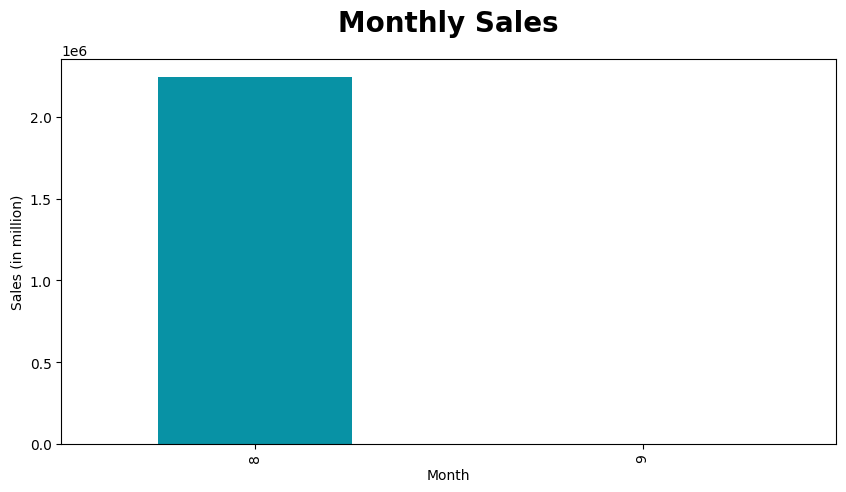

In [50]:
# Plot monthly sales
df_month = df.groupby('Month')['Sales'].sum()
plt.figure(figsize=(10, 5))
df_month.plot(kind='bar', color=['#0892a5', '#2e9b9b', '#50a290', '#6fa985', '#8dad7f', '#a9b17e', '#c4b383', '#dbb68f'])
plt.title('Monthly Sales', weight='bold', fontsize=20, pad=20)
plt.ylabel('Sales (in million)')
plt.show()

2. Hourly Sales Analysis

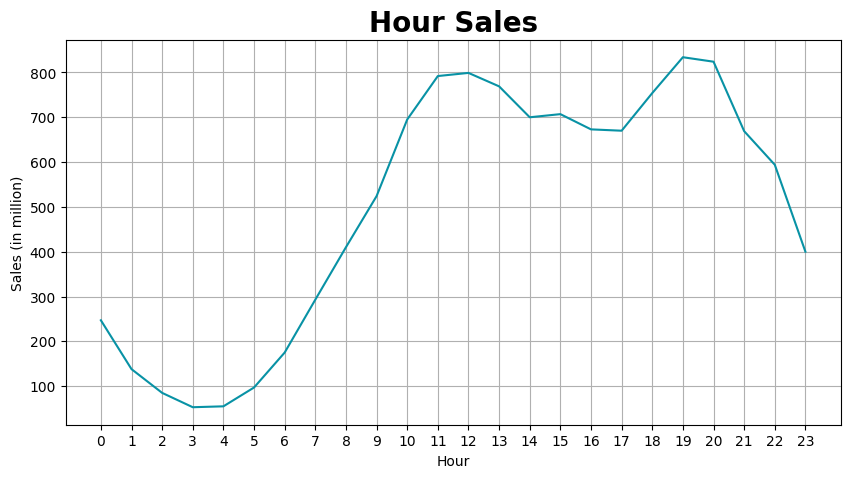

In [51]:
# Plot hourly sales
df_hour = df.groupby('Hour')['Quantity Ordered'].count()
plt.figure(figsize=(10, 5))
plt.plot(df_hour.index, df_hour.values)
plt.title('Hour Sales', weight='bold', fontsize=20)
plt.grid(True)
plt.xticks(ticks=df_hour.index)
plt.ylabel('Sales (in million)')
plt.xlabel('Hour')
plt.show()

3. City-Specific Performance Analysis

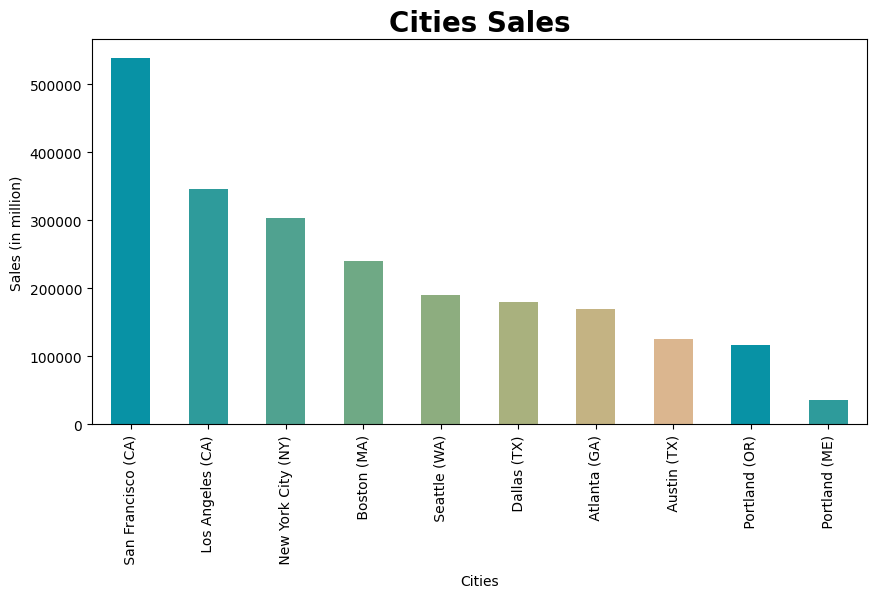

In [52]:
# Plot city-specific sales
df_city = df.groupby('Cities')['Sales'].sum()
plt.figure(figsize=(10, 5))
df_city.sort_values(ascending=False).plot(kind='bar', color=['#0892a5', '#2e9b9b', '#50a290', '#6fa985', '#8dad7f', '#a9b17e', '#c4b383', '#dbb68f'])
plt.title('Cities Sales', weight='bold', fontsize=20)
plt.ylabel('Sales (in million)')
plt.show()

4. Popular Products Analysis

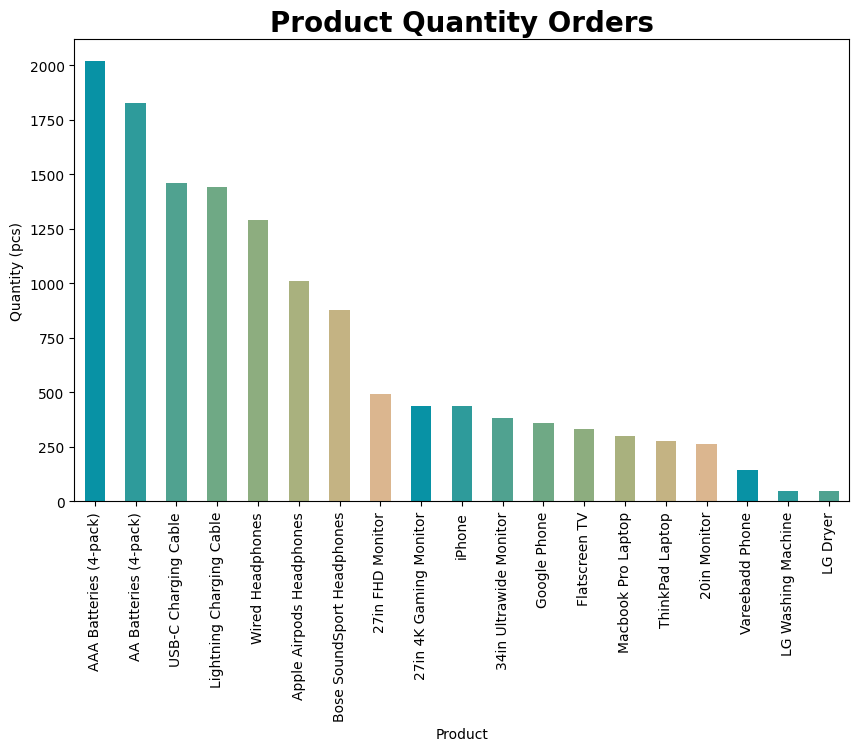

In [53]:
# Plot the most popular products by quantity ordered
df_product = df.groupby('Product')['Quantity Ordered'].sum()
df_product = df_product.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
df_product.plot(kind='bar', color=['#0892a5', '#2e9b9b', '#50a290', '#6fa985', '#8dad7f', '#a9b17e', '#c4b383', '#dbb68f'])
plt.title('Product Quantity Orders', weight='bold', fontsize=20)
plt.ylabel('Quantity (pcs)')
plt.show()

5. Product Combinations Analysis

In [54]:
# Identify common product combinations for cross-selling opportunities
from itertools import combinations
from collections import Counter

In [55]:
# Drop rows with duplicate Order IDs
data = df[df['Order ID'].duplicated(keep=False)]
data['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
data = data[['Order ID', 'Grouped']].drop_duplicates()

In [56]:
# Count product combinations
count = Counter()
for row in data['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

In [57]:
# Display the most common product combinations
print("Top 10 most common product combinations:")
for key, value in count.most_common(10):
    print(f"{key}: {value} times")

Top 10 most common product combinations:
('iPhone', 'Lightning Charging Cable'): 66 times
('Google Phone', 'USB-C Charging Cable'): 61 times
('iPhone', 'Apple Airpods Headphones'): 26 times
('Google Phone', 'Wired Headphones'): 23 times
('Vareebadd Phone', 'USB-C Charging Cable'): 22 times
('iPhone', 'Wired Headphones'): 22 times
('Google Phone', 'Bose SoundSport Headphones'): 12 times
('USB-C Charging Cable', 'Wired Headphones'): 9 times
('Vareebadd Phone', 'Bose SoundSport Headphones'): 9 times
('Vareebadd Phone', 'Wired Headphones'): 7 times


6. Yearly and Monthly Probabilities Analysis

In [58]:
def proba_prod(product, df):
    """
    Calculate the monthly and yearly probabilities for a given product.

    Arguments:
    product -- The name of the product to calculate probabilities for.
    df -- The DataFrame containing the data.

    Returns:
    A tuple (prob_month, prob_year):
    prob_month -- A numpy array of monthly probabilities.
    prob_year -- The yearly probability.
    """
    total_rows = df.shape[0]
    product_df = df[df['Product'] == product]
    product_rows = product_df.shape[0]
    prob_year = round(product_rows / total_rows * 100, 2)

    monthly_probabilities = []
    for month in range(1, 13):
        monthly_total = df[df['Month'] == month].shape[0]
        monthly_product = product_df[product_df['Month'] == month].shape[0]
        if monthly_total == 0:
            monthly_probabilities.append(0)
        else:
            monthly_probability = round((monthly_product / monthly_total) * 100, 3)
            monthly_probabilities.append(monthly_probability)
    prob_month = np.array(monthly_probabilities)

    return prob_month, prob_year

In [59]:
# Define the list of products to analyze
products = [
    'USB-C Charging Cable', 'Lightning Charging Cable', 'Google Phone', 'iPhone',
    'Wired Headphones', 'Apple Airpods Headphones', 'Bose SoundSport Headphones'
]

In [60]:
# Calculate and display probabilities for each product
for product in products:
    prob_month, prob_year = proba_prod(product, df)
    print(f'Yearly probability for {product}: {prob_year}%')
    print(f'Monthly probabilities for {product}: {prob_month}')
    print()


Yearly probability for USB-C Charging Cable: 11.24%
Monthly probabilities for USB-C Charging Cable: [ 0.     0.     0.     0.     0.     0.     0.    11.235 16.667  0.
  0.     0.   ]

Yearly probability for Lightning Charging Cable: 11.33%
Monthly probabilities for Lightning Charging Cable: [ 0.     0.     0.     0.     0.     0.     0.    11.327 16.667  0.
  0.     0.   ]

Yearly probability for Google Phone: 2.99%
Monthly probabilities for Google Phone: [0.    0.    0.    0.    0.    0.    0.    2.997 0.    0.    0.    0.   ]

Yearly probability for iPhone: 3.66%
Monthly probabilities for iPhone: [0.    0.    0.    0.    0.    0.    0.    3.667 0.    0.    0.    0.   ]

Yearly probability for Wired Headphones: 9.97%
Monthly probabilities for Wired Headphones: [0.    0.    0.    0.    0.    0.    0.    9.979 0.    0.    0.    0.   ]

Yearly probability for Apple Airpods Headphones: 8.36%
Monthly probabilities for Apple Airpods Headphones: [ 0.     0.     0.     0.     0.     0.     0